<a href="https://colab.research.google.com/github/himanshupandeyy/Eda_capstone_project/blob/main/user_review_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
user_review_df = pd.read_csv("/content/drive/MyDrive/ALMA EDA CAPSTONE PROJECT/User Reviews.csv")

Eda on user_review dataset

Descreptive statistics

In [ ]:
user_review_df.shape

(64295, 5)

In [ ]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


There are missing values in dataset

In [ ]:
user_review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


We have two numerical columns only

In [ ]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


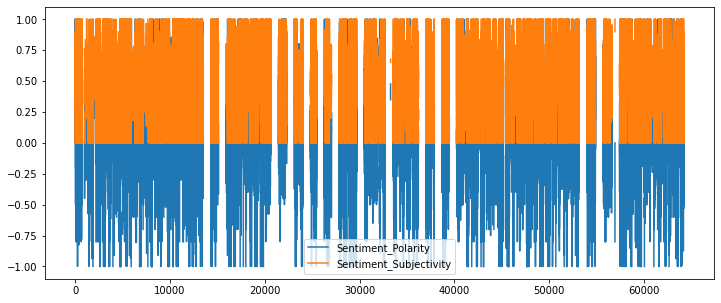

In [ ]:
plt.rcParams["figure.figsize"] = (12,5)
user_review_df.plot()

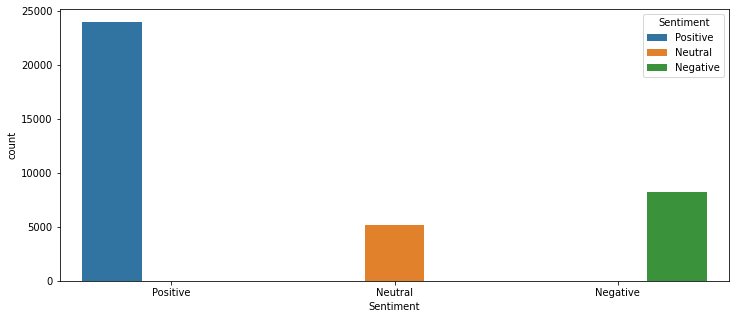

In [ ]:
sns.countplot(x ='Sentiment', data = user_review_df, hue = "Sentiment")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


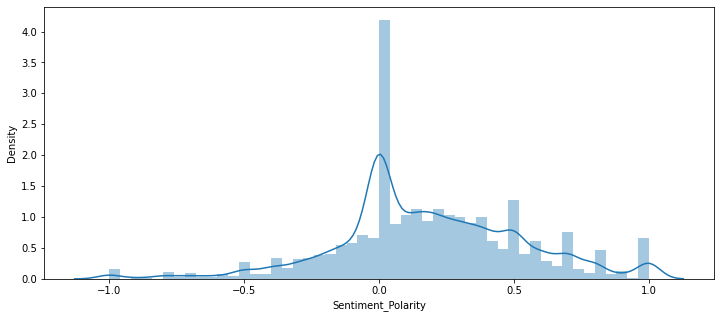

In [ ]:
 sns.distplot(user_review_df["Sentiment_Polarity"])

In [ ]:
user_review_df["Sentiment_Polarity"].skew()


-0.10458074172202056

In [ ]:
# This column is negative skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


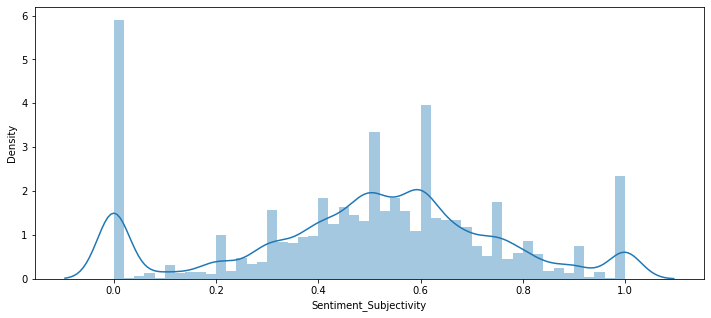

In [ ]:
sns.distplot(user_review_df["Sentiment_Subjectivity"])

In [ ]:
user_review_df["Sentiment_Subjectivity"].skew()

-0.3063458787749447

In [ ]:
# This column is negative skewed

In [ ]:
# check relation ship between numerical variables with heat map

In [ ]:
user_review_df.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261651
Sentiment_Subjectivity,0.261651,1.000000


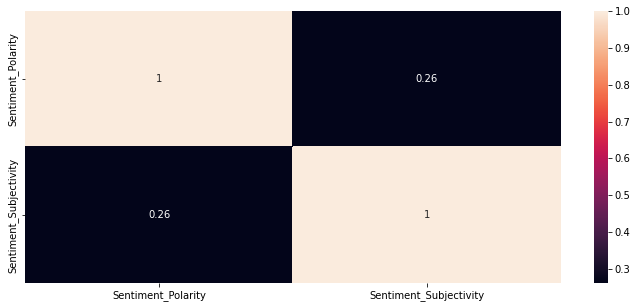

In [ ]:
sns.heatmap(user_review_df.corr(), annot =True)

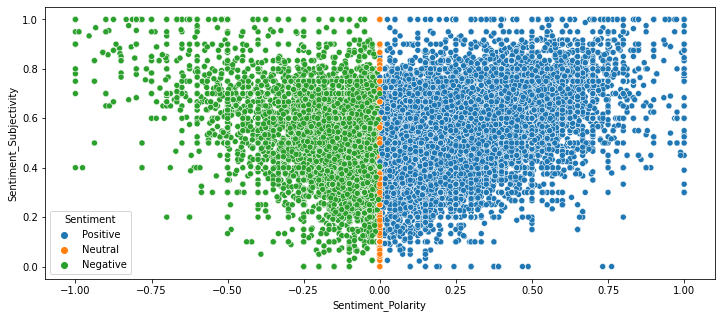

In [ ]:
sns.scatterplot(x = "Sentiment_Polarity" , y ='Sentiment_Subjectivity', data =user_review_df , hue ="Sentiment")

In [ ]:
# They are  not so linear 

Now check missing_values

In [ ]:
user_review_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# check percentage of missing values in dataset

In [ ]:
total_percentage = round(user_review_df.isna().sum(axis=0)/user_review_df.shape[0]*100)

In [ ]:
print(total_percentage)

App                        0.0
Translated_Review         42.0
Sentiment                 42.0
Sentiment_Polarity        42.0
Sentiment_Subjectivity    42.0
dtype: float64


In [ ]:
# 40% values are missing. So we can directly delete those columns because every column has equal missing values.

In [ ]:
user_review_df.dropna(inplace=True)

In [ ]:
user_review_df.isna().any()

App                       False
Translated_Review         False
Sentiment                 False
Sentiment_Polarity        False
Sentiment_Subjectivity    False
dtype: bool

Bivariate and multivariate analyse

In [ ]:
user_review_df.groupby(["App", "Sentiment"]).size().reset_index().value_counts()

App                             Sentiment  0 
10 Best Foods for You           Negative   10    1
Facebook Pages Manager          Positive   10    1
Facetune - Ad Free              Neutral    4     1
                                Positive   33    1
Fake Call - Fake Caller ID      Negative   8     1
                                                ..
Business Calendar 2             Positive   18    1
Butterfly Live Wallpaper        Neutral    8     1
                                Positive   20    1
Buzz Launcher-Smart&Free Theme  Negative   10    1
Housing-Real Estate & Property  Positive   8     1
Length: 2376, dtype: int64

# find out positive and negative apps with sentiment

In [ ]:
user_review_positive_sentiment_app  = user_review_df[user_review_df["Sentiment"]== "Positive" ]

In [ ]:
user_review_positive_sentiment_app.count()

App                       23998
Translated_Review         23998
Sentiment                 23998
Sentiment_Polarity        23998
Sentiment_Subjectivity    23998
dtype: int64

In [ ]:
print(user_review_positive_sentiment_app)

                                  App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
5               10 Best Foods for You   
...                               ...   
64217  Housing-Real Estate & Property   
64221  Housing-Real Estate & Property   
64222  Housing-Real Estate & Property   
64223  Housing-Real Estate & Property   
64227  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
5                                               Best way  Positive   
...                                                  ...       ...   
64217  I able set

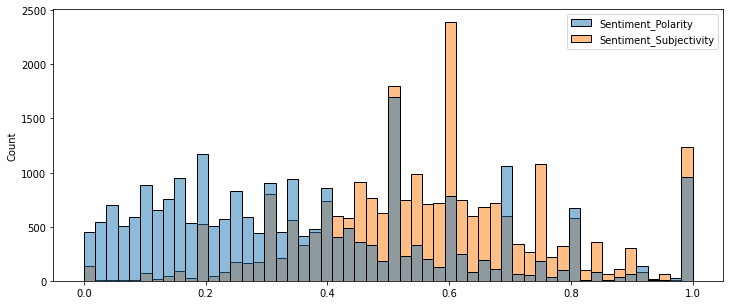

In [ ]:
sns.histplot(user_review_positive_sentiment_app)

In [ ]:
user_review_negative_sentiment_app  = user_review_df[user_review_df["Sentiment"]== "Negative" ]

In [ ]:
user_review_negative_sentiment_app.count()

App                       8271
Translated_Review         8271
Sentiment                 8271
Sentiment_Polarity        8271
Sentiment_Subjectivity    8271
dtype: int64

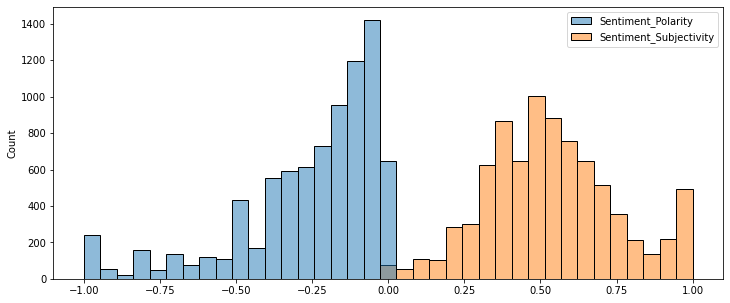

In [ ]:
sns.histplot(user_review_negative_sentiment_app)